<div class="alert alert-block alert-info">
<ul><strong>
<li>Justin Chin | Miguel Dominguez</li>
<li>CSC 59929</li>
<li>Machine Learning</li>
<li>Dr. Erik K. Grimmelmann</li>
<li>Date: </li>
<li>Project</li>
</strong>
</ul>
</div>

In [18]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

<img src="bones.jpg">

# About the dataset

In [19]:
#Get Bird Bone Dataframe
birds = pd.read_csv('bird.csv', sep=',')
new_columns = ['ID', 'Humerus L', 'Humerus D', 'Ulna L','Ulna D', 'Femur L', 'Femur D',
              'Tibiotarsus L', 'Tibiotarsus D', 'Tarsometatarsus L','Tarsometatarsus D', 'Type'] 
birds.columns = new_columns

#Drop rows with NaN values
birds = birds.dropna()

birds.head()

,ID,Humerus L,Humerus D,Ulna L,Ulna D,Femur L,Femur D,Tibiotarsus L,Tibiotarsus D,Tarsometatarsus L,Tarsometatarsus D,Type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [20]:
#Get data X and class Y
X = birds.iloc[:,1:11].values
y = birds['Type'].values

#Transform Type values for birds into numerical classes ranging from 0 to 5
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)
#y # 3,5,4,1,0,2 === > SW, W, T, R, P, SO

In [21]:
#Build a dictionary with the feature names.
label = [ 'Humerus L', 'Humerus D', 'Ulna L','Ulna D', 'Femur L', 'Femur D',
              'Tibiotarsus L', 'Tibiotarsus D', 'Tarsometatarsus L','Tarsometatarsus D']
feature_dict = {i:label for i,label in zip(range(0,11), new_columns)}

#Labels for Classes
label_dict = {3: 'SW', 5: 'W', 4: 'T', 1: 'R', 0: 'P', 2: 'SO'}

# Functions (write documentation for functions, graphing fuct, others)

In [22]:
def plot_decision_regions(X, y, classifier,
    test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('^', 's', 'o','^', 's', 'o')
    #colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colors = colors2
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    #if test_idx:
       # X_test, y_test = X[test_idx, :], y[test_idx]
        #plt.scatter(X_test[:, 0], X_test[:, 1], c='',
        #alpha=1.0, linewidth=1, marker='o',
       # s=55, label='test set')

In [23]:
def make_meshgrid(x, y, h=.01):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #out = ax.contourf(xx, yy, Z, **params)
    out = ax.contourf(xx, yy, Z, color = col, alpha=0.8)
    return out

def barchart(model_accuracy, model_title,optext):
    """Plot bars for accuracy for each model.
    
    Parameters
    ----------
    model_accuracy: list of float accuracy values
    model_title: list of names for each model
    optext: optional string that is part of plot graph
    """
    width = 0.75
    ind = np.arange(10)
    fig, ax = plt.subplots(figsize=(20,15))
    colors = ['#DEB887','#A1EAFB','#CFEE91','#FFFF99','#49BEB7','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
    bars = ax.bar([0,1,2,3,4,5,6,7,8,9], model_accuracy , width, color=colors)

    #Add some text for labels, title and axes ticks
    ax.set_xlabel("Models",fontsize=20)
    ax.set_ylabel('Accuracy',fontsize=20)
    ax.set_title('SVM Kernels Models and their Accuracy' + optext,fontsize=35)
    ax.set_xticks(ind) #Positioning on the x axis
    ax.set_xticklabels(range(0,10),
                      fontsize = 20)
    ax.legend(bars,model_title, loc= 'upper center',fontsize=25)

    def autolabel(rects,fontsize=20):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1*height,height,
                    ha='center', va='bottom',fontsize=fontsize)
    autolabel(bars)
    plt.ylim([0,2])
    plt.show()

# Statistics

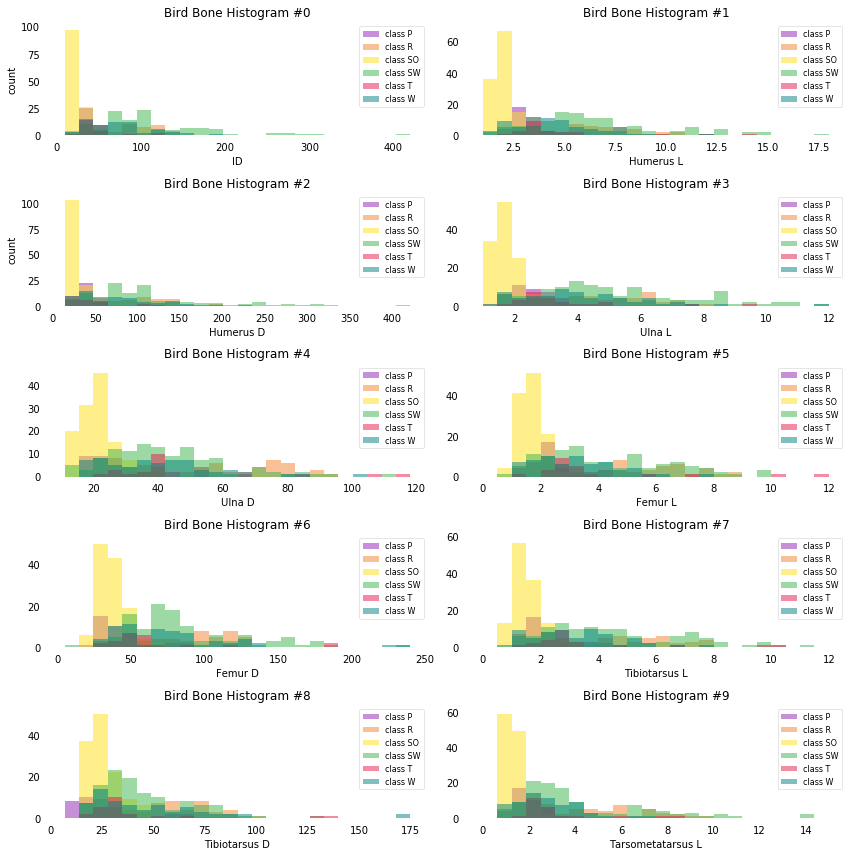

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,12))

for ax,cnt in zip(axes.ravel(), range(0,11)):  
    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)
    
    colors1 = ('red','blue','green','#658525', '#4EEAF6', '#FFCEF3')
    colors2 = ('#911eb4','#f58231','#ffe119','#3cb44b','#e6194b','#008080')
    # plottling the histograms
    for lab,col in zip(range(0,6), colors2 ):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Bird Bone Histogram #%s' %str(cnt))
    
    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")
    
    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')
fig.tight_layout()       
plt.show()

# Pre-processing techniques:

# Linear Discriminant Analysis (LDA)

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
Xlda = sklearn_lda.fit_transform(X, y)

In [26]:
def plot_scikit_lda(X, title):
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
    
    for label,marker,color in zip(
        range(0,6),('^', 's', 'o','^', 's', 'o'), colors2):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label], # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title,fontsize=20)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    #plt.tight_layout
    plt.show()

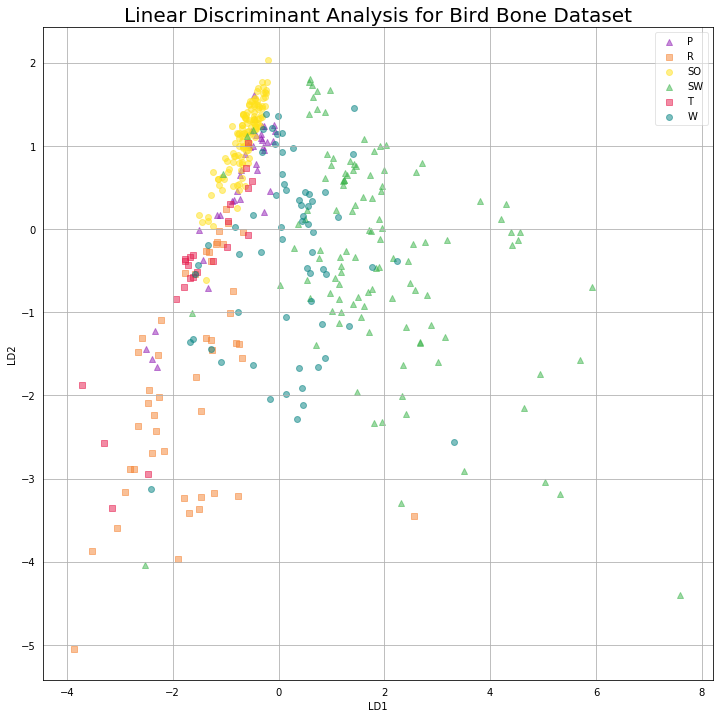

In [27]:
plot_scikit_lda(Xlda, title='Linear Discriminant Analysis for Bird Bone Dataset')

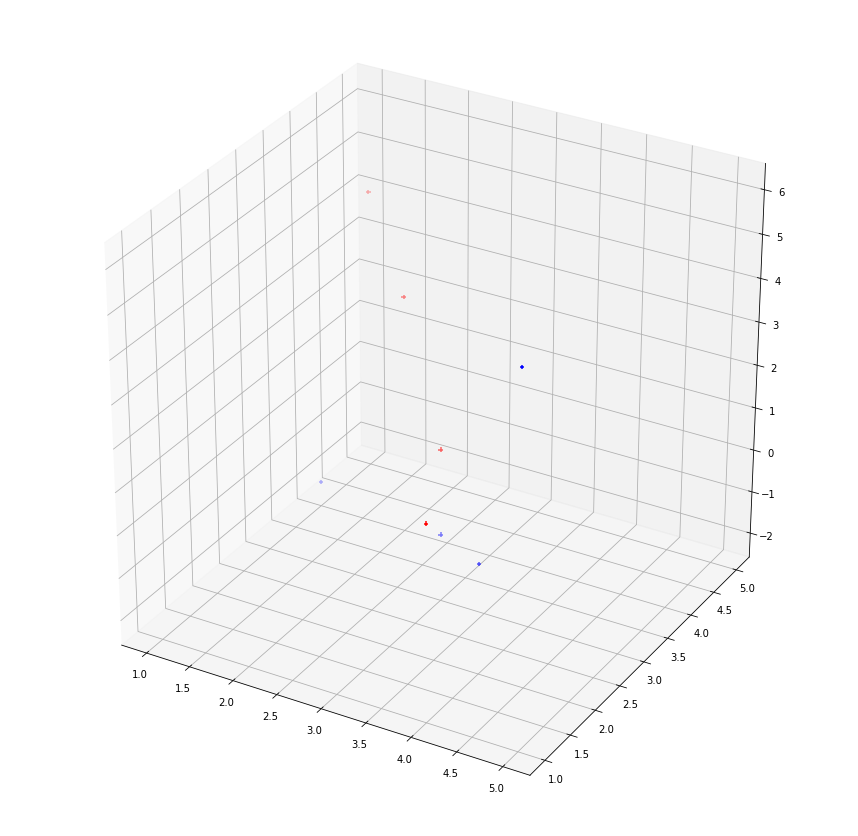

In [10]:
#Graph
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter([1,2,3,4], [5,4,3,1], [4,3,1,2], c=('r','b','g'),marker='+')
ax.scatter([5,4,3,1], [1,2,3,4],  [6,0,-1,-2], c=('b','g'),marker='+')
plt.show()

# Principal Component Analysis

# Randomized PCA

# Isomap

# LLE

# Models:

# Perceptron

In [ ]:
#Justin

# Adaline

In [ ]:
#Miguel

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

Logimodel = LogisticRegression()
Logimodel.fit(X[:,(0,1)],y)
Logimodel.score(X[:,(0,1)],y)



0.5447941888619855

In [30]:
from sklearn.linear_model import LogisticRegression

Logimodel = LogisticRegression(C=1)
Logimodel.fit(X,y)
Logimodel.score(X,y)

0.89104116222760288

# SVM (no kernel)

In [13]:
from sklearn import svm
col = ['red','blue','green','#658525', '#4EEAF6', '#FFCEF3']

In [14]:
#Create model 
SVMmodel = svm.SVC(kernel='linear')
#SVMmodel = svm.SVC(kernel='poly', degree=2)
#Train the model
SVMmodel.fit(X[:,(0,1)], y)
#Print Accuracy
SVMmodel.score(X[:,(0,1)],y)

0.61743341404358354

In [15]:
#Create model 
SVMmodel = svm.SVC(kernel='linear')
#Train the model
SVMmodel.fit(X[:,0:1], y)
#Print Accuracy
SVMmodel.score(X[:,0:1],y)

0.55932203389830504

In [16]:
#plot_decision_regions(X=X[:,(0,1)],y=y, classifier=SVMmodel, test_idx=range(105,150))
plot_decision_regions(X=X[:,(0,1)],y=y, classifier=SVMmodel)
#plot_decision_regions(X=Xlda,y=y, classifier=SVMmodel)
plt.show()

ValueError: X.shape[1] = 2 should be equal to 1, the number of features at training time

# Decision Trees

In [ ]:
#Miguel

# AdaBoosting

In [ ]:
#Justin

# Random Forests

In [ ]:
#Justin

# SVM Kernels

# K-nearest Neighbors

In [ ]:
#Miguel

# K-means 

In [ ]:
#Miguel

# Spectral Clustering

# Meanshift

# SGD classifier

# Regression 

In [ ]:
#Justin

# Neural Networks

In [ ]:
#Both

# Naive Bayes

In [ ]:
#Justin

# Aprior Algorithm 

In [ ]:
#Miguel 